In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import pandas_datareader.data as web
import datetime

In [2]:
start = datetime.datetime(2005,1,1)#26 day before start year for make indicator
end = datetime.datetime(2010,1,3)
df = web.DataReader('KTC.bk','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-04,2.440,2.41,2.420,2.430,1736000.0,1.390840
2005-01-05,2.500,2.43,2.440,2.500,4212000.0,1.430905
2005-01-06,2.525,2.48,2.480,2.500,1879000.0,1.430905
2005-01-07,2.550,2.50,2.500,2.525,4317000.0,1.445215
2005-01-10,2.525,2.42,2.525,2.430,9565000.0,1.390840


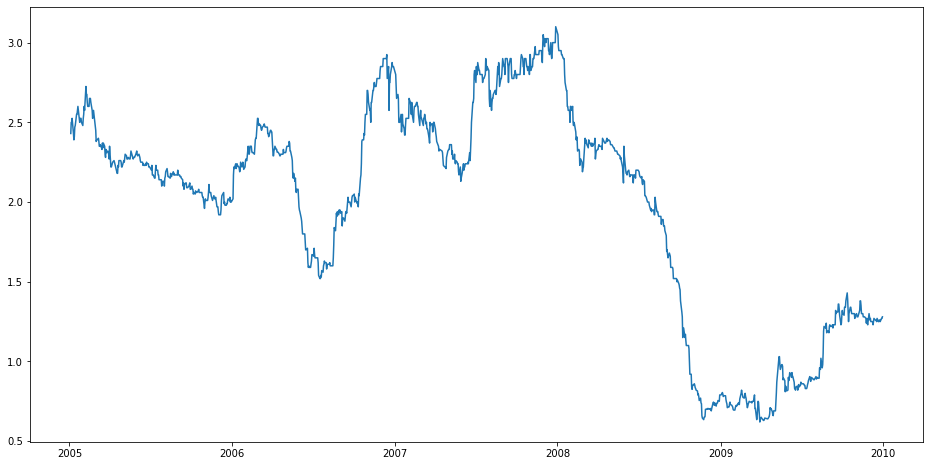

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=data.index,columns=['Close'])
new_data['Close'] = data['Close']
new_data.head()

,Close
Date,
2005-01-04,2.430
2005-01-05,2.500
2005-01-06,2.500
2005-01-07,2.525
2005-01-10,2.430


In [5]:
len(new_data)

1242

In [6]:
#creating train and test sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

In [7]:
#converting dataset into x_train and y_train      60 day data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
927/927 [==============================] - 22s 24ms/step - loss: 0.0036
Epoch 2/10
927/927 [==============================] - 23s 25ms/step - loss: 0.0014
Epoch 3/10
927/927 [==============================] - 20s 22ms/step - loss: 0.0010
Epoch 4/10
927/927 [==============================] - 23s 25ms/step - loss: 8.6530e-04
Epoch 5/10
927/927 [==============================] - 24s 26ms/step - loss: 7.0226e-04
Epoch 6/10
927/927 [==============================] - 24s 26ms/step - loss: 6.6618e-04
Epoch 7/10
927/927 [==============================] - 24s 26ms/step - loss: 5.7654e-04 0s - loss: 5.78
Epoch 8/10
927/927 [==============================] - 23s 25ms/step - loss: 5.3514e-04
Epoch 9/10
927/927 [==============================] - 23s 25ms/step - loss: 5.7442e-04
Epoch 10/10
927/927 [==============================] - 24s 26ms/step - loss: 5.5129e-04


In [16]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = scaler.transform(inputs)
# X_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)

# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# closing_price = model.predict(X_test)
# closing_price = scaler.inverse_transform(closing_price)
# closing_price
inputs

array([[1.51999998],
       [1.51999998],
       [1.51999998],
       [1.51999998],
       [1.5       ],
       [1.50999999],
       [1.49000001],
       [1.48000002],
       [1.46000004],
       [1.45000005],
       [1.38      ],
       [1.30999994],
       [1.27999997],
       [1.14999998],
       [1.17999995],
       [1.21000004],
       [1.14999998],
       [1.16999996],
       [1.13      ],
       [1.10000002],
       [1.10000002],
       [1.10000002],
       [1.10000002],
       [1.08000004],
       [0.92000002],
       [0.92000002],
       [0.83999997],
       [0.82499999],
       [0.85000002],
       [0.85000002],
       [0.86000001],
       [0.85000002],
       [0.83499998],
       [0.82999998],
       [0.81999999],
       [0.815     ],
       [0.79000002],
       [0.79500002],
       [0.77999997],
       [0.755     ],
       [0.76999998],
       [0.74000001],
       [0.73500001],
       [0.66000003],
       [0.64499998],
       [0.63499999],
       [0.64999998],
       [0.649

In [10]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.05481063729568495

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


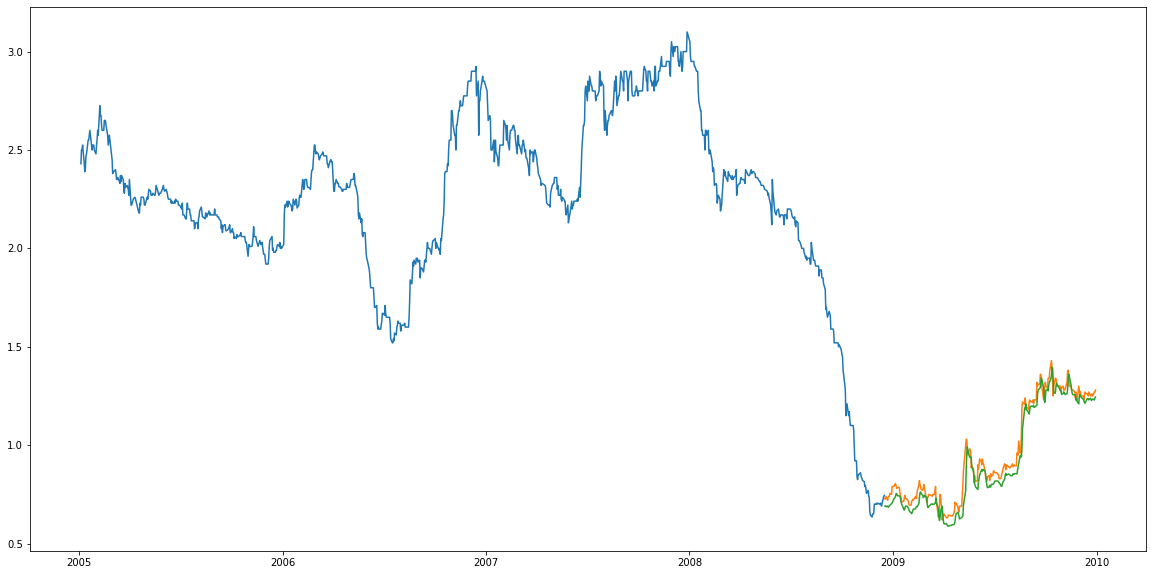

In [11]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [32]:
start = datetime.datetime(2011,1,1)#26 day before start year for make indicator
end = datetime.datetime(2012,1,1)
df = web.DataReader('KTC.bk','yahoo',start,end)
newdf = df['Close'].values
newdf = newdf.reshape(-1,1)
# newdf = scaler.transform(newdf)

In [38]:
X_test = []
for i in range(60,newdf.shape[0]):
    X_test.append(newdf[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(184, 60, 1)

In [53]:
cp = model.predict(X_test)
cp = scaler.inverse_transform(cp)
len(cp)

184

In [61]:
pdf = df[60:]
pdf['Pred'] = cp

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


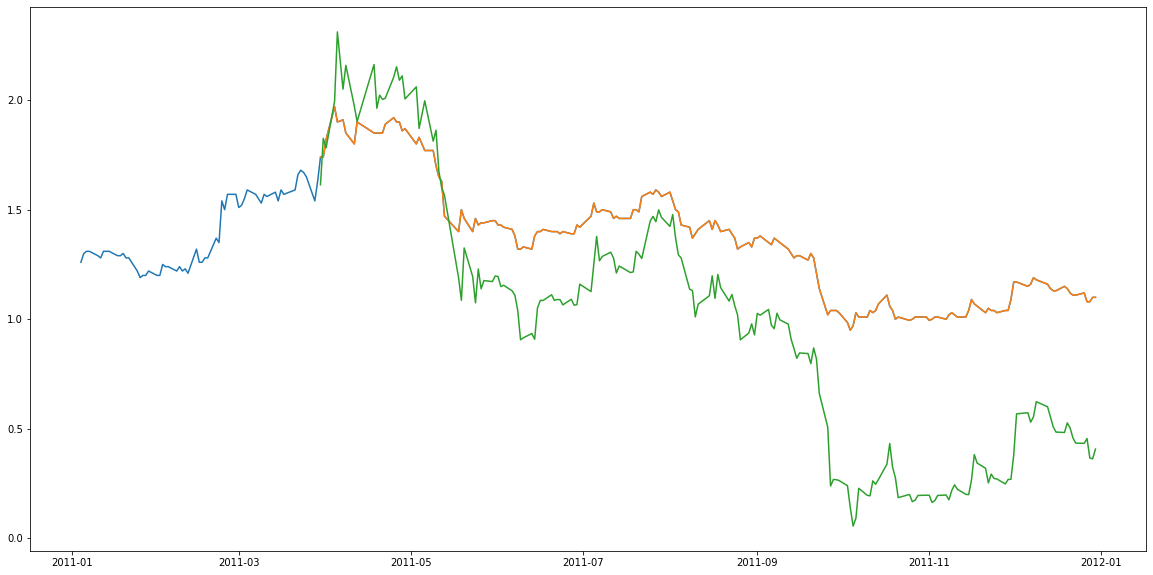

In [62]:
plt.plot(df['Close'])
plt.plot(pdf[['Close','Pred']])